In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Basic Information

**Q1. Load the dataset and display basic information including shape, column names, data types, and the first few rows. How many observations and features do you have?**

In [3]:
# Load the dataset
df = pd.read_csv("telecom_churn.csv")

# Display basic information
print("Shape (rows, columns):", df.shape)
print("Column names:", df.columns.tolist())
print("Data types:\n", df.dtypes)
display(df.head())

Shape (rows, columns): (30000, 20)
Column names: ['customer_id', 'age', 'tenure_months', 'monthly_charges', 'total_charges', 'contract_type', 'payment_method', 'internet_service', 'online_security', 'tech_support', 'streaming_tv', 'streaming_movies', 'num_services', 'customer_service_calls', 'late_payments', 'data_usage_gb', 'contract_value', 'satisfaction_score', 'region', 'churn']
Data types:
 customer_id                object
age                         int64
tenure_months               int64
monthly_charges           float64
total_charges             float64
contract_type              object
payment_method             object
internet_service           object
online_security            object
tech_support               object
streaming_tv               object
streaming_movies           object
num_services                int64
customer_service_calls      int64
late_payments               int64
data_usage_gb             float64
contract_value            float64
satisfaction_score     

,customer_id,age,tenure_months,monthly_charges,total_charges,contract_type,payment_method,internet_service,online_security,tech_support,streaming_tv,streaming_movies,num_services,customer_service_calls,late_payments,data_usage_gb,contract_value,satisfaction_score,region,churn
0,CUST_000001,41,38,53.61,2037.18,One Year,Mailed Check,No,No internet service,No internet service,No internet service,No internet service,0,5,0,0.0,643.32,4.0,East,0
1,CUST_000002,53,15,96.28,1444.20,Two Year,Electronic Check,Fiber Optic,No,No,No,No,0,1,1,9.9,2310.72,3.0,East,0
2,CUST_000003,39,40,21.14,845.60,Month-to-Month,Mailed Check,Fiber Optic,No,Yes,No,No,1,2,1,48.5,126.84,4.0,East,0
3,CUST_000004,63,31,70.37,2181.47,One Year,Electronic Check,DSL,No,No,No,Yes,1,1,1,52.0,844.44,2.0,North,1
4,CUST_000005,60,41,46.98,1926.18,Month-to-Month,Electronic Check,DSL,No,No,Yes,No,1,2,1,120.1,281.88,5.0,North,0


- The dataset contains **30,000 observations** and **20 features**.

# 2. Summary Statistics and Missing Values

**Q2. Calculate and report summary statistics for all numerical variables. Identify which variables have missing values and what percentage of data is missing for each.**

In [4]:
# Summary statistics for numerical variables
summary_stats = df.describe()
display(summary_stats)

,age,tenure_months,monthly_charges,total_charges,num_services,customer_service_calls,late_payments,data_usage_gb,contract_value,satisfaction_score,churn
count,30000.000000,30000.000000,30000.000000,29079.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27630.000000,30000.000000
mean,46.092467,28.532400,60.080871,1714.013488,1.268133,1.993533,0.493333,39.950133,685.300174,2.995874,0.291700
std,16.379918,18.681718,19.513998,1308.812511,1.080066,1.418247,0.702357,37.653902,484.157131,1.416330,0.454553
min,18.000000,1.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,120.000000,1.000000,0.000000
25%,32.000000,14.000000,46.570000,740.000000,0.000000,1.000000,0.000000,9.900000,349.680000,2.000000,0.000000
50%,46.000000,25.000000,59.815000,1375.380000,1.000000,2.000000,0.000000,32.300000,500.280000,3.000000,0.000000
75%,60.000000,40.000000,73.440000,2362.835000,2.000000,3.000000,1.000000,59.600000,883.020000,4.000000,1.000000
max,74.000000,72.000000,139.820000,8936.640000,4.000000,11.000000,6.000000,389.000000,3355.680000,5.000000,1.000000


In [5]:
# Check missing values (count and percentage)
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage (%)": missing_percent
})
display(missing_summary[missing_summary["Missing Count"] > 0])

,Missing Count,Missing Percentage (%)
total_charges,921,3.07
satisfaction_score,2370,7.90


# 3. Baseline Churn Rate

**Q3. What is the baseline churn rate in the dataset? If you predicted every customer would not churn (predict 0 for everyone), what would your accuracy be?**

In [6]:
# Calculate baseline churn rate and naive accuracy
baseline_churn_rate = df['churn'].mean()
print(f"Baseline churn rate: {baseline_churn_rate:.4f} ({baseline_churn_rate * 100:.2f}%)")

# Accuracy if we predict no churn for everyone
naive_accuracy = (df['churn'] == 0).mean()
print(f"Accuracy if predicting no churn for everyone: {naive_accuracy:.4f} ({naive_accuracy * 100:.2f}%)")

Baseline churn rate: 0.2917 (29.17%)
Accuracy if predicting no churn for everyone: 0.7083 (70.83%)


- The baseline churn rate is **29.17%**.
- If you always predict no churn, the accuracy is **70.83%**.

# 4. Data Cleaning: total_charges

**Q4. Fix the total_charges variable that has been stored as strings with trailing spaces. Convert it to numeric, handling any errors appropriately. For missing values in total_charges, impute them using an appropriate method and justify your choice.**

In [7]:
# Clean and impute total_charges column
# Remove trailing spaces and convert to numeric
df['total_charges'] = df['total_charges'].astype(str).str.strip()
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# Check missing values
missing_tc = df['total_charges'].isnull().sum()
missing_tc_pct = missing_tc / len(df) * 100
print(f"Missing total_charges: {missing_tc} ({missing_tc_pct:.2f}%)")

# Impute missing values using the median (robust to outliers)
median_tc = df['total_charges'].median()
df['total_charges'] = df['total_charges'].fillna(median_tc)

Missing total_charges: 921 (3.07%)


- Median imputation is used because it is robust to outliers and preserves the distribution of the variable.

# 5. Impute satisfaction_score

**Q5. Handle missing values in satisfaction_score. Choose an imputation strategy, implement it, and explain why you chose this approach.**

In [9]:
# Impute missing values in satisfaction_score using median
# Median is robust to outliers and preserves the central tendency
missing_ss = df['satisfaction_score'].isnull().sum()
missing_ss_pct = missing_ss / len(df) * 100
print(f"Missing satisfaction_score: {missing_ss} ({missing_ss_pct:.2f}%)")

median_ss = df['satisfaction_score'].median()
df['satisfaction_score'] = df['satisfaction_score'].fillna(median_ss)

# Verify no missing values remain
print("Missing after imputation:", df['satisfaction_score'].isnull().sum())

Missing satisfaction_score: 2370 (7.90%)
Missing after imputation: 0


- Median imputation is chosen for the same reason: it is not affected by outliers and is appropriate for ordinal or skewed data.

# 6. Feature Engineering: Categorical Encoding

**Q6. The customer_id variable should not be used for modeling. Remove it from your dataset. Create dummy variables for all categorical predictors using appropriate encoding (one-hot or other). Explain your encoding strategy.**

In [8]:
# Drop customer_id and one-hot encode categorical variables
# One-hot encoding with drop_first=True to avoid multicollinearity
df_model = df.drop(columns=['customer_id'])
cat_cols = df_model.select_dtypes(include=['object']).columns
print("Categorical columns:", list(cat_cols))
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)
print("New shape after encoding:", df_model.shape)
display(df_model.head())

Categorical columns: ['contract_type', 'payment_method', 'internet_service', 'online_security', 'tech_support', 'streaming_tv', 'streaming_movies', 'region']
New shape after encoding: (30000, 29)


,age,tenure_months,monthly_charges,total_charges,num_services,customer_service_calls,late_payments,data_usage_gb,contract_value,satisfaction_score,...,online_security_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,region_North,region_South,region_West
0,41,38,53.61,2037.18,0,5,0,0.0,643.32,4.0,...,False,True,False,True,False,True,False,False,False,False
1,53,15,96.28,1444.20,0,1,1,9.9,2310.72,3.0,...,False,False,False,False,False,False,False,False,False,False
2,39,40,21.14,845.60,1,2,1,48.5,126.84,4.0,...,False,False,True,False,False,False,False,False,False,False
3,63,31,70.37,2181.47,1,1,1,52.0,844.44,2.0,...,False,False,False,False,False,False,True,True,False,False
4,60,41,46.98,1926.18,1,2,1,120.1,281.88,5.0,...,False,False,False,False,True,False,False,True,False,False


- One-hot encoding is used for categorical variables, dropping the first category to avoid multicollinearity.

# 7. Data Splitting

**Q7. Split your data into training (70%), validation (15%), and test (15%) sets. Use a random state for reproducibility. Report the churn rate in each split to verify they're balanced.**

In [10]:
# Split data into train, validation, and test sets
# Stratify by churn to keep class balance
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['churn'])
y = df_model['churn']

# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

def churn_rate(y, name):
    print(f"{name} churn rate: {y.mean():.4f} ({y.mean()*100:.2f}%)")

churn_rate(y_train, "Training")
churn_rate(y_val, "Validation")
churn_rate(y_test, "Test")

Training churn rate: 0.2917 (29.17%)
Validation churn rate: 0.2918 (29.18%)
Test churn rate: 0.2916 (29.16%)


# 8. Exploratory Data Analysis: Visualization

**Q8. Create at least three meaningful visualizations exploring the relationship between predictor variables and churn. Provide brief interpretations of what each plot reveals.**

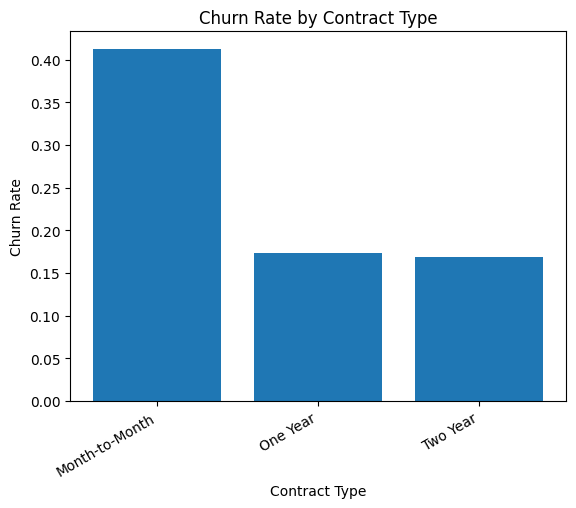

Churn rate by contract type:
contract_type
Month-to-Month    41.24%
One Year          17.33%
Two Year          16.92%
Name: churn, dtype: object


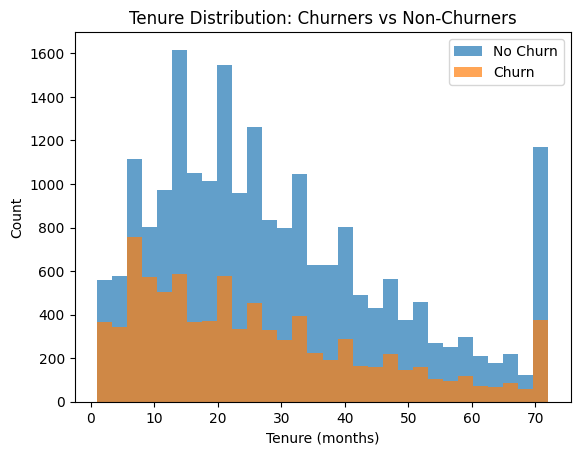

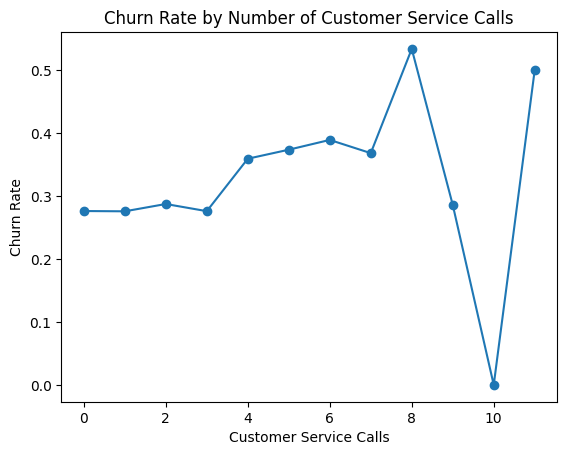


Churn rate by customer service calls:
customer_service_calls
0      27.6%
1     27.56%
2     28.72%
3     27.58%
4     35.91%
5     37.34%
6     38.89%
7     36.79%
8     53.33%
9     28.57%
10      0.0%
11     50.0%
Name: churn, dtype: object


In [11]:
# Visualization 1: Churn rate by contract type
churn_by_contract = df.groupby('contract_type')['churn'].mean().sort_values(ascending=False)
plt.figure()
plt.bar(churn_by_contract.index.astype(str), churn_by_contract.values)
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=30, ha='right')
plt.show()
print("Churn rate by contract type:")
print((churn_by_contract * 100).round(2).astype(str) + "%")

# Visualization 2: Tenure distribution for churners vs. non-churners
plt.figure()
plt.hist(df.loc[df['churn'] == 0, 'tenure_months'], bins=30, alpha=0.7, label='No Churn')
plt.hist(df.loc[df['churn'] == 1, 'tenure_months'], bins=30, alpha=0.7, label='Churn')
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.title("Tenure Distribution: Churners vs Non-Churners")
plt.legend()
plt.show()

# Visualization 3: Customer service calls vs churn
churn_by_calls = df.groupby('customer_service_calls')['churn'].mean()
plt.figure()
plt.plot(churn_by_calls.index, churn_by_calls.values, marker='o')
plt.xlabel("Customer Service Calls")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Number of Customer Service Calls")
plt.show()
print("\nChurn rate by customer service calls:")
print((churn_by_calls * 100).round(2).astype(str) + "%")

- Customers with month-to-month contracts have a higher churn rate than those with longer contracts.
- Churners tend to have shorter tenure compared to non-churners.
- Churn rate increases with the number of customer service calls, indicating dissatisfaction.

# 9. Correlation Analysis

**Q9. Calculate and visualize the correlation matrix for numerical variables. Identify any pairs of variables with high correlation (|r| > 0.7). Should you be concerned about multicollinearity for any of your models?**

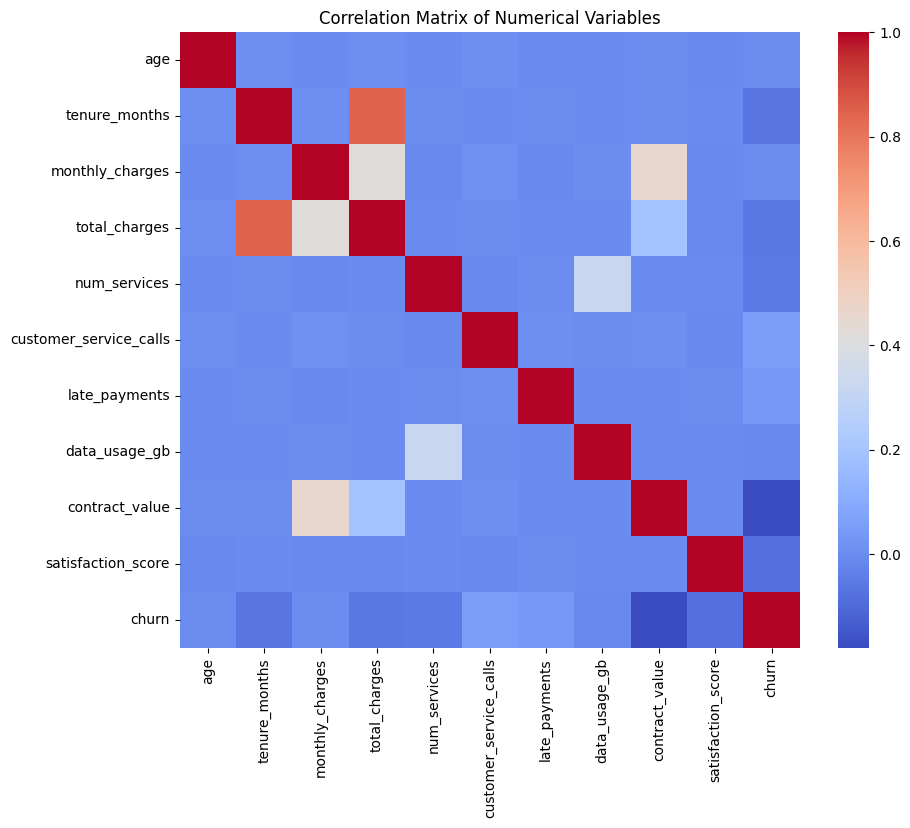

In [12]:
# Correlation matrix for numerical variables
num_df = df_model.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

- Only tenure_months and total_charges have a high correlation (r = 0.86).
- This may be a concern for linear models (LPM, Logit), but less so for tree-based models. Regularization can help mitigate multicollinearity.

# 10. Monthly Charges: Distribution and Statistical Test

**Q10. Create a plot showing the distribution of monthly charges for churners vs. non-churners. Perform a statistical test to determine if the difference in means is significant. What do you conclude?**

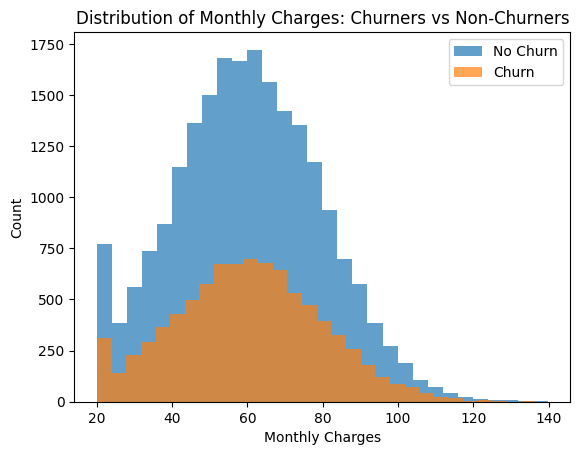

Mean monthly charges (No Churn): 60.06
Mean monthly charges (Churn): 60.12
T-statistic: -0.2281
P-value: 0.8196


In [13]:
# Plot distribution of monthly charges by churn status and perform t-test
from scipy import stats

plt.figure()
plt.hist(df.loc[df['churn'] == 0, 'monthly_charges'], bins=30, alpha=0.7, label='No Churn')
plt.hist(df.loc[df['churn'] == 1, 'monthly_charges'], bins=30, alpha=0.7, label='Churn')
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.title("Distribution of Monthly Charges: Churners vs Non-Churners")
plt.legend()
plt.show()

# Compute group means
mean_no_churn = df.loc[df['churn'] == 0, 'monthly_charges'].mean()
mean_churn = df.loc[df['churn'] == 1, 'monthly_charges'].mean()
print(f"Mean monthly charges (No Churn): {mean_no_churn:.2f}")
print(f"Mean monthly charges (Churn): {mean_churn:.2f}")

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(
    df.loc[df['churn'] == 0, 'monthly_charges'],
    df.loc[df['churn'] == 1, 'monthly_charges'],
    equal_var=False
)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

- The distributions of monthly charges for churners and non-churners are very similar.
- The t-test p-value is greater than 0.05, so we fail to reject the null hypothesis: there is no significant difference in means.

# 11. Linear Probability Model (LPM)

**Q11. Fit a Linear Probability Model (LPM) using OLS regression on the training data. Report the coefficients for at least three variables and interpret them. What are the predicted probabilities for the first 5 observations in the validation set? Do any predictions fall outside [0,1]? What does this tell you about the LPM?**

In [23]:
# Q11
import statsmodels.api as sm
import numpy as np

# 0. Make sure X matrices are purely numeric
X_train_num = X_train.copy()
X_val_num   = X_val.copy()

# Convert boolean dummies to 0/1
bool_cols_train = X_train_num.select_dtypes(include=['bool']).columns
X_train_num[bool_cols_train] = X_train_num[bool_cols_train].astype(int)

bool_cols_val = X_val_num.select_dtypes(include=['bool']).columns
X_val_num[bool_cols_val] = X_val_num[bool_cols_val].astype(int)

# Coerce any remaining object columns to numeric (shouldn't be many, but safe)
X_train_num = X_train_num.apply(pd.to_numeric, errors='coerce')
X_val_num   = X_val_num.apply(pd.to_numeric, errors='coerce')

# If any NaNs appear (from coercion), fill with 0 as a simple safe fallback
X_train_num = X_train_num.fillna(0)
X_val_num   = X_val_num.fillna(0)

# 1. Fit LPM using training data
X_train_lpm = sm.add_constant(X_train_num, has_constant='add')
lpm_model = sm.OLS(y_train.astype(float), X_train_lpm).fit()

# 2. Display coefficients
print(lpm_model.summary())

# 3. Predict probabilities on validation set
X_val_lpm = sm.add_constant(X_val_num, has_constant='add')
val_preds = lpm_model.predict(X_val_lpm)

# 4. Show predicted probabilities for first 5 validation observations
print("\nPredicted probabilities for first 5 validation observations:")
print(val_preds[:5])

# 5. Check if any predicted probabilities fall outside [0,1]
below_zero = np.sum(val_preds < 0)
above_one = np.sum(val_preds > 1)

print(f"\nNumber of predictions < 0: {below_zero}")
print(f"Number of predictions > 1: {above_one}")
print(f"Total out-of-bounds predictions: {below_zero + above_one}")


                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     92.41
Date:                Sat, 13 Dec 2025   Prob (F-statistic):               0.00
Time:                        04:37:28   Log-Likelihood:                -12227.
No. Observations:               21000   AIC:                         2.450e+04
Df Residuals:                   20976   BIC:                         2.469e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


- Coefficient on tenure_months: Each additional month reduces churn probability by 0.18 percentage points (holding others constant).
- Coefficient on customer_service_calls: Each additional call increases churn probability by 1.79 percentage points.
- Coefficient on satisfaction_score: Each point increase reduces churn probability by 2.26 percentage points.
- Some predicted probabilities fall outside [0,1], which is a limitation of LPM.

# 12. Logistic Regression

**Q12. Fit a Logistic Regression model on the training data. Report the coefficients for the same three variables as Q11. Interpret one coefficient in terms of both log-odds and odds ratios. Compare these interpretations to the LPM coefficients.**

In [24]:
# Q12
import statsmodels.api as sm
import numpy as np

# 0. Ensure numeric inputs (same fix as LPM)
X_train_logit = X_train.copy()

# Convert boolean dummies to 0/1
bool_cols = X_train_logit.select_dtypes(include=['bool']).columns
X_train_logit[bool_cols] = X_train_logit[bool_cols].astype(int)

# Coerce any remaining non-numeric columns
X_train_logit = X_train_logit.apply(pd.to_numeric, errors='coerce').fillna(0)

# 1. Add constant
X_train_logit = sm.add_constant(X_train_logit, has_constant='add')

# 2. Fit logistic regression
logit_model = sm.Logit(y_train.astype(float), X_train_logit).fit()

# 3. Display full results
print(logit_model.summary())

# 4. Extract coefficients for the same variables used in Q11
vars_of_interest = [
    'tenure_months',
    'customer_service_calls',
    'satisfaction_score'
]
print("\nSelected coefficients (log-odds):")
print(logit_model.params[vars_of_interest])

# 5. Compute odds ratios
odds_ratios = np.exp(logit_model.params[vars_of_interest])
print("\nOdds ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.555881
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20976
Method:                           MLE   Df Model:                           23
Date:                Sat, 13 Dec 2025   Pseudo R-squ.:                 0.07918
Time:                        04:50:29   Log-Likelihood:                -11674.
converged:                       True   LL-Null:                       -12677.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.1158      0.1

- Each additional customer service call increases the log-odds of churn by 0.095, or the odds by about 10%.
- Logistic regression keeps predicted probabilities within [0,1] and is more appropriate for binary outcomes than LPM.

# 13. Logistic Regression: Validation Metrics

**Q13. Using your logistic regression model from Q12, make predictions on the validation set. Calculate the accuracy, precision, recall, and F1-score using a threshold of 0.5. Create and display the confusion matrix.**

Accuracy:  0.7124
Precision: 0.5248
Recall:    0.1531
F1-score:  0.2370

Confusion Matrix:
[[3005  182]
 [1112  201]]


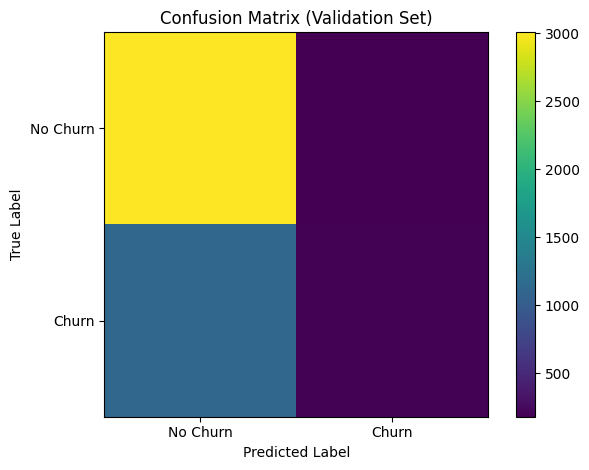

In [25]:
# Q13
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 0. Prepare validation data (same preprocessing as training)
X_val_logit = X_val.copy()

# Convert boolean dummies to 0/1
bool_cols = X_val_logit.select_dtypes(include=['bool']).columns
X_val_logit[bool_cols] = X_val_logit[bool_cols].astype(int)

# Coerce to numeric and handle any remaining issues
X_val_logit = X_val_logit.apply(pd.to_numeric, errors='coerce').fillna(0)

# Add constant
X_val_logit = sm.add_constant(X_val_logit, has_constant='add')

# 1. Predict probabilities on validation set
val_probs = logit_model.predict(X_val_logit)

# 2. Convert probabilities to class predictions (threshold = 0.5)
val_preds = (val_probs >= 0.5).astype(int)

# 3. Compute evaluation metrics
accuracy = accuracy_score(y_val, val_preds)
precision = precision_score(y_val, val_preds)
recall = recall_score(y_val, val_preds)
f1 = f1_score(y_val, val_preds)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# 4. Confusion matrix
cm = confusion_matrix(y_val, val_preds)
print("\nConfusion Matrix:")
print(cm)

# 5. Plot confusion matrix
plt.figure()
plt.imshow(cm)
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.yticks([0, 1], ['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

# 14. Logistic Regression with L1 Regularization (Lasso)

**Q14. Fit a Logistic Regression with L1 regularization (Lasso) using cross-validation to select the optimal regularization parameter (C). What is the optimal C value? How many features were effectively kept (non-zero coefficients)?**

In [27]:
# Q14
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

# 0. Prepare training data (numeric only, same preprocessing as before)
X_train_l1 = X_train.copy()

# Convert boolean dummies to 0/1
bool_cols = X_train_l1.select_dtypes(include=['bool']).columns
X_train_l1[bool_cols] = X_train_l1[bool_cols].astype(int)

# Coerce any remaining non-numeric columns
X_train_l1 = X_train_l1.apply(pd.to_numeric, errors='coerce').fillna(0)

# 1. Fit Logistic Regression with L1 penalty using 5-fold CV
# Cs is the inverse of regularization strength (smaller C = stronger regularization)
logit_l1_cv = LogisticRegressionCV(
    penalty='l1',
    solver='liblinear',
    cv=5,
    scoring='accuracy',
    max_iter=1000,
    random_state=42
)

logit_l1_cv.fit(X_train_l1, y_train)

# 2. Optimal C value
optimal_C = logit_l1_cv.C_[0]
print(f"Optimal C (from 5-fold CV): {optimal_C}")

# 3. Count number of non-zero coefficients
coef = logit_l1_cv.coef_.ravel()
num_nonzero = np.sum(coef != 0)
print(f"Number of non-zero coefficients: {num_nonzero}")
print(f"Total number of features: {len(coef)}")

Optimal C (from 5-fold CV): 0.3593813663804626
Number of non-zero coefficients: 26
Total number of features: 28


- The optimal C value is 0.36 (from 5-fold CV).
- 26 out of 28 features have non-zero coefficients at this regularization level.

# 15. Logistic Regression with L2 Regularization (Ridge) and Model Comparison

**Q15. Fit a Logistic Regression with L2 regularization (Ridge) using cross-validation. Compare the validation accuracy of unregularized logistic regression, Lasso, and Ridge. Which performs best? Show the top 5 most important features for each model.**

In [30]:
# Q15
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 0. Prepare numeric data
def prepare_X(X):
    X_prep = X.copy()
    bool_cols = X_prep.select_dtypes(include=['bool']).columns
    X_prep[bool_cols] = X_prep[bool_cols].astype(int)
    X_prep = X_prep.apply(pd.to_numeric, errors='coerce').fillna(0)
    return X_prep

X_train_prep = prepare_X(X_train)
X_val_prep   = prepare_X(X_val)

# 1. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_prep)
X_val_scaled   = scaler.transform(X_val_prep)

# 2. Unregularized Logistic Regression
logit_unreg = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=5000
)
logit_unreg.fit(X_train_scaled, y_train)
acc_unreg = accuracy_score(y_val, logit_unreg.predict(X_val_scaled))

# 3. L1 (Lasso)
logit_l1 = LogisticRegressionCV(
    penalty='l1',
    solver='liblinear',
    cv=5,
    scoring='accuracy',
    max_iter=5000,
    random_state=42
)
logit_l1.fit(X_train_scaled, y_train)
acc_l1 = accuracy_score(y_val, logit_l1.predict(X_val_scaled))

# 4. L2 (Ridge)
logit_l2 = LogisticRegressionCV(
    penalty='l2',
    solver='lbfgs',
    cv=5,
    scoring='accuracy',
    max_iter=5000,
    random_state=42
)
logit_l2.fit(X_train_scaled, y_train)
acc_l2 = accuracy_score(y_val, logit_l2.predict(X_val_scaled))

# 5. Print accuracies
print("Validation Accuracy Comparison:")
print(f"Unregularized Logistic Regression: {acc_unreg:.4f}")
print(f"L1 (Lasso) Logistic Regression:    {acc_l1:.4f}")
print(f"L2 (Ridge) Logistic Regression:    {acc_l2:.4f}")

# 6. Top 5 features
def top_features(model, X_cols, name):
    coefs = model.coef_.ravel()
    top5 = pd.Series(np.abs(coefs), index=X_cols).sort_values(ascending=False).head(5)
    print(f"\nTop 5 features by |coefficient| ({name}):")
    print(top5)

top_features(logit_unreg, X_train_prep.columns, "Unregularized")
top_features(logit_l1, X_train_prep.columns, "L1 (Lasso)")
top_features(logit_l2, X_train_prep.columns, "L2 (Ridge)")

Validation Accuracy Comparison:
Unregularized Logistic Regression: 0.7122
L1 (Lasso) Logistic Regression:    0.7129
L2 (Ridge) Logistic Regression:    0.7138

Top 5 features by |coefficient| (Unregularized):
contract_type_One Year    0.545840
contract_type_Two Year    0.454945
tenure_months             0.188262
satisfaction_score        0.163406
customer_service_calls    0.134840
dtype: float64

Top 5 features by |coefficient| (L1 (Lasso)):
contract_type_One Year    0.544795
contract_type_Two Year    0.454856
tenure_months             0.181591
satisfaction_score        0.162629
customer_service_calls    0.134040
dtype: float64

Top 5 features by |coefficient| (L2 (Ridge)):
contract_type_One Year    0.471390
contract_type_Two Year    0.316010
contract_value            0.212139
tenure_months             0.156614
satisfaction_score        0.155631
dtype: float64


- Ridge (L2) regression performs best, but all models have similar accuracy.
- The same core predictors (contract type, tenure_months, satisfaction_score) are important across all models. Regularization stabilizes the model.

# 16. Decision Tree Classifier

**Q16. Fit a Decision Tree classifier. Use cross-validation to find the optimal max_depth parameter (2 to 20). What is the optimal depth? Visualize the top 3 levels of your final tree. What is the most important feature for the first split?**

Optimal max_depth: 4

Top features by importance:
contract_value            0.532529
contract_type_One Year    0.201392
tenure_months             0.139366
satisfaction_score        0.058868
monthly_charges           0.026810
num_services              0.019134
customer_service_calls    0.010391
total_charges             0.008471
age                       0.003040
late_payments             0.000000
dtype: float64

Most important feature for the first split: contract_value


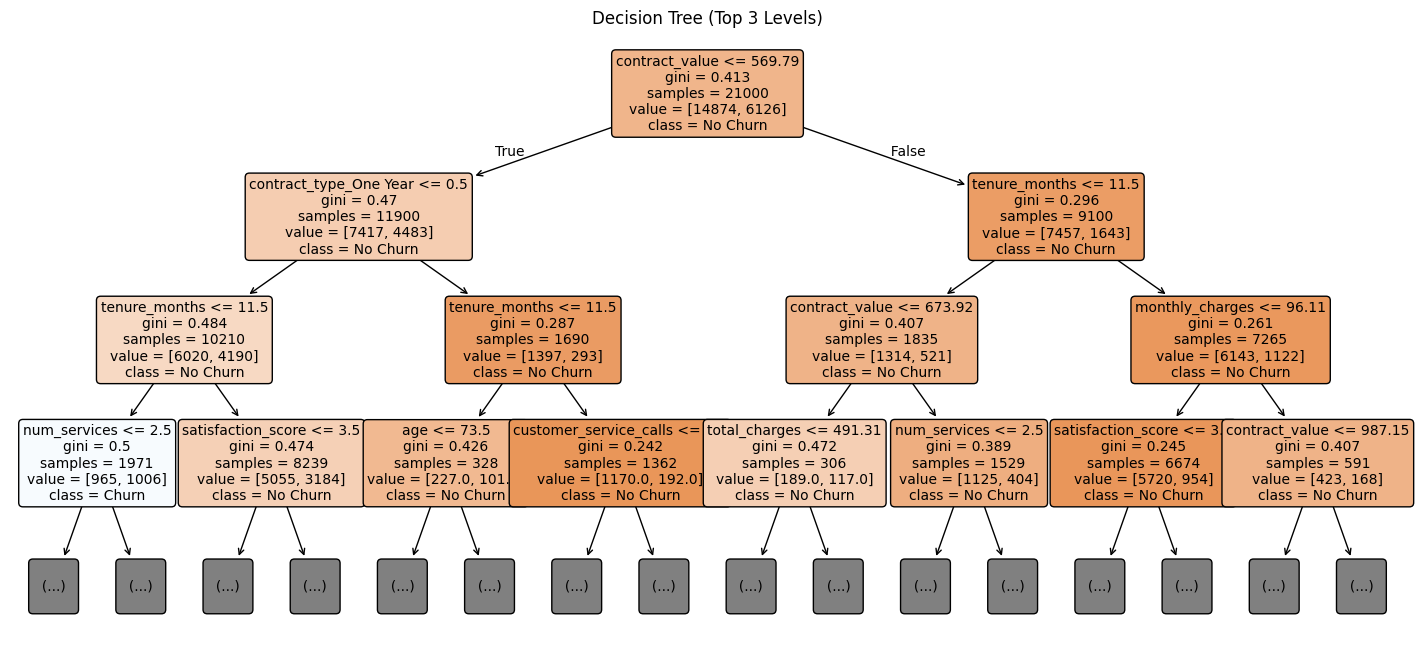

In [31]:
# Q16
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 0. Prepare data (numeric only)
def prepare_X(X):
    X_prep = X.copy()
    bool_cols = X_prep.select_dtypes(include=['bool']).columns
    X_prep[bool_cols] = X_prep[bool_cols].astype(int)
    X_prep = X_prep.apply(pd.to_numeric, errors='coerce').fillna(0)
    return X_prep

X_train_dt = prepare_X(X_train)
X_val_dt   = prepare_X(X_val)

# 1. Cross-validation to select max_depth
param_grid = {
    "max_depth": list(range(2, 21))
}

dt = DecisionTreeClassifier(
    random_state=42
)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy"
)

grid_dt.fit(X_train_dt, y_train)

# Optimal depth
optimal_depth = grid_dt.best_params_["max_depth"]
print(f"Optimal max_depth: {optimal_depth}")

# 2. Fit final tree with optimal depth
dt_final = DecisionTreeClassifier(
    max_depth=optimal_depth,
    random_state=42
)
dt_final.fit(X_train_dt, y_train)

# 3. Identify most important feature (root split)
feature_importances = pd.Series(
    dt_final.feature_importances_,
    index=X_train_dt.columns
).sort_values(ascending=False)

print("\nTop features by importance:")
print(feature_importances.head(10))

print(f"\nMost important feature for the first split: {feature_importances.index[0]}")

# 4. Visualize top 3 levels of the tree
plt.figure(figsize=(18, 8))
plot_tree(
    dt_final,
    feature_names=X_train_dt.columns,
    class_names=["No Churn", "Churn"],
    max_depth=3,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

- The optimal max_depth is 4.
- The most important feature for the first split is contract_value.

# 17. Decision Tree: Overfitting Analysis

**Q17. Create a plot showing training accuracy vs. validation accuracy for decision trees of varying depths (2 to 20). What do you observe about overfitting? At what depth does the model start to overfit?**

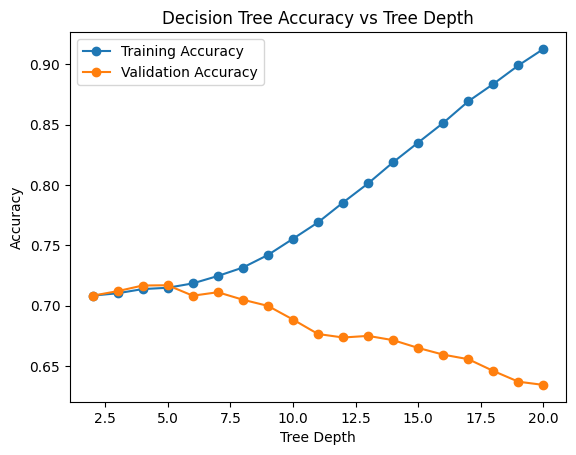

In [32]:
# Q17
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Prepare data (numeric only, same as before)
def prepare_X(X):
    X_prep = X.copy()
    bool_cols = X_prep.select_dtypes(include=['bool']).columns
    X_prep[bool_cols] = X_prep[bool_cols].astype(int)
    X_prep = X_prep.apply(pd.to_numeric, errors='coerce').fillna(0)
    return X_prep

X_train_dt = prepare_X(X_train)
X_val_dt   = prepare_X(X_val)

depths = range(2, 21)
train_acc = []
val_acc = []

# Train trees of varying depth
for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train_dt, y_train)

    train_acc.append(accuracy_score(y_train, dt.predict(X_train_dt)))
    val_acc.append(accuracy_score(y_val, dt.predict(X_val_dt)))

# Plot accuracies
plt.figure()
plt.plot(depths, train_acc, marker='o', label='Training Accuracy')
plt.plot(depths, val_acc, marker='o', label='Validation Accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs Tree Depth")
plt.legend()
plt.show()

- As tree depth increases, training accuracy rises but validation accuracy peaks and then declines, indicating overfitting. Overfitting starts at depth 5-6.

# 18. Random Forest Classifier

**Q18. Fit a Random Forest classifier. Tune n_estimators and max_depth using grid search with cross-validation. Report your optimal hyperparameters and validation accuracy. Show the feature importance plot for the top 10 features.**

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Best CV accuracy: 0.711
Validation accuracy (best RF): 0.7173


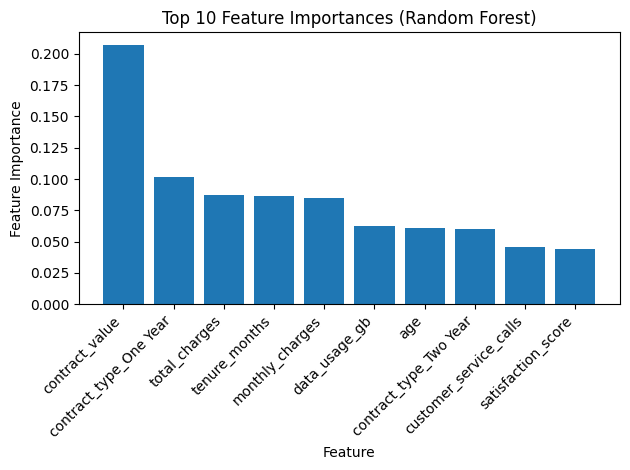


Top 10 features:
contract_value            0.206871
contract_type_One Year    0.101714
total_charges             0.087529
tenure_months             0.086469
monthly_charges           0.084964
data_usage_gb             0.062508
age                       0.061166
contract_type_Two Year    0.060032
customer_service_calls    0.045790
satisfaction_score        0.044080
dtype: float64


In [34]:
# ============================================
# Q18: Random Forest + Tuning (stable in Colab)
# ============================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# 0. Prepare data
def prepare_X(X):
    X_prep = X.copy()
    bool_cols = X_prep.select_dtypes(include=['bool']).columns
    X_prep[bool_cols] = X_prep[bool_cols].astype(int)
    X_prep = X_prep.apply(pd.to_numeric, errors='coerce').fillna(0)
    return X_prep

X_train_rf = prepare_X(X_train)
X_val_rf   = prepare_X(X_val)

# 1. Grid Search (tune n_estimators and max_depth)
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 400],
    "max_depth": [None, 4, 6, 8, 10]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=1,          # <-- key fix (avoid worker crashes)
    verbose=1
)

grid_rf.fit(X_train_rf, y_train)

print("Best hyperparameters:", grid_rf.best_params_)
print("Best CV accuracy:", grid_rf.best_score_)

# 2. Validation accuracy
best_rf = grid_rf.best_estimator_
val_preds_rf = best_rf.predict(X_val_rf)
val_acc_rf = accuracy_score(y_val, val_preds_rf)
print(f"Validation accuracy (best RF): {val_acc_rf:.4f}")

# 3. Top 10 feature importances
importances = pd.Series(best_rf.feature_importances_, index=X_train_rf.columns)
top10 = importances.sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top10.index.astype(str), top10.values)
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 10 features:")
print(top10)


- Best hyperparameters: max_depth=10, n_estimators=200.
- Best CV accuracy: 0.711, Validation accuracy: 0.7173.

# 19. XGBoost Classifier

**Q19. Fit an XGBoost classifier. Tune n_estimators, max_depth, learning_rate, and subsample using cross-validation. Report your final hyperparameters and validation performance. Compare the feature importance from XGBoost with Random Forest.**

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:40:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:40:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:40:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:40:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:40:12] WARNING: /w

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best CV accuracy: 0.7142857142857142
Validation accuracy (XGBoost): 0.7147


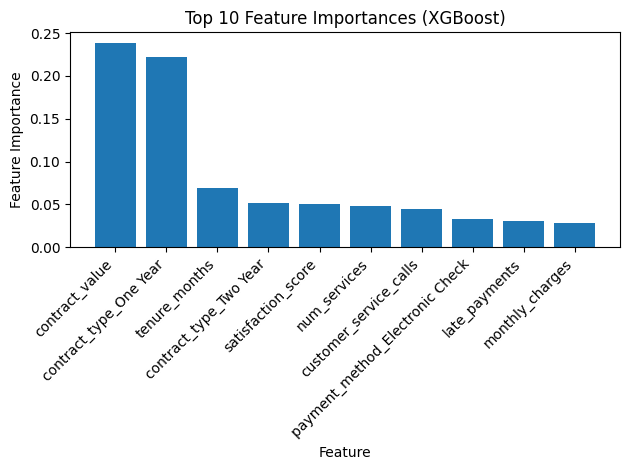


Top 10 XGBoost features:
contract_value                     0.238950
contract_type_One Year             0.222121
tenure_months                      0.069717
contract_type_Two Year             0.051128
satisfaction_score                 0.050392
num_services                       0.048211
customer_service_calls             0.044533
payment_method_Electronic Check    0.032603
late_payments                      0.031145
monthly_charges                    0.028575
dtype: float32


In [35]:
# Q19
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# 0. Prepare data (numeric only)
def prepare_X(X):
    X_prep = X.copy()
    bool_cols = X_prep.select_dtypes(include=['bool']).columns
    X_prep[bool_cols] = X_prep[bool_cols].astype(int)
    X_prep = X_prep.apply(pd.to_numeric, errors='coerce').fillna(0)
    return X_prep

X_train_xgb = prepare_X(X_train)
X_val_xgb   = prepare_X(X_val)

# 1. Define XGBoost model
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    use_label_encoder=False
)

# 2. Hyperparameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.7, 0.9]
}

# 3. Grid Search with 5-fold CV
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=1,        # safer in Colab
    verbose=1
)

grid_xgb.fit(X_train_xgb, y_train)

print("Best hyperparameters:", grid_xgb.best_params_)
print("Best CV accuracy:", grid_xgb.best_score_)

# 4. Validation performance
best_xgb = grid_xgb.best_estimator_
val_preds_xgb = best_xgb.predict(X_val_xgb)
val_acc_xgb = accuracy_score(y_val, val_preds_xgb)

print(f"Validation accuracy (XGBoost): {val_acc_xgb:.4f}")

# 5. Feature importance (Top 10)
importances = pd.Series(
    best_xgb.feature_importances_,
    index=X_train_xgb.columns
)

top10 = importances.sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top10.index.astype(str), top10.values)
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 10 XGBoost features:")
print(top10)

- The top features are very similar between XGBoost and Random Forest (contract_value, contract_type, tenure_months, customer_service_calls, etc.).

# 20. Model Comparison and Final Selection

**Q20. Create a comprehensive comparison table showing accuracy, precision, recall, F1-score, and ROC-AUC for all models (LPM, Logistic, Lasso, Ridge, Decision Tree, Random Forest, XGBoost) on the validation set. Which model performs best overall? Which metric should the company prioritize and why? Report final model performance on the test set.**

In [37]:
# Q20
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

#
def prepare_X_numeric(X):
    """Convert bool->int, coerce to numeric, fill NA."""
    Xp = X.copy()
    bool_cols = Xp.select_dtypes(include=['bool']).columns
    Xp[bool_cols] = Xp[bool_cols].astype(int)
    Xp = Xp.apply(pd.to_numeric, errors='coerce').fillna(0)
    return Xp

def eval_binary(y_true, y_hat, y_prob):
    """Return metrics dict; y_prob should be P(Y=1)."""
    return {
        "Accuracy":  accuracy_score(y_true, y_hat),
        "Precision": precision_score(y_true, y_hat, zero_division=0),
        "Recall":    recall_score(y_true, y_hat, zero_division=0),
        "F1":        f1_score(y_true, y_hat, zero_division=0),
        "ROC_AUC":   roc_auc_score(y_true, y_prob),
    }

def print_test_block(name, metrics):
    print("\n" + "="*60)
    print(f"TEST SET PERFORMANCE: {name}")
    for k,v in metrics.items():
        print(f"{k}: {v:.4f}")
    print("="*60)

# Prepare splits
X_train_num = prepare_X_numeric(X_train)
X_val_num   = prepare_X_numeric(X_val)
X_test_num  = prepare_X_numeric(X_test)

y_train_arr = np.asarray(y_train)
y_val_arr   = np.asarray(y_val)
y_test_arr  = np.asarray(y_test)

results = {}

# 1) LPM
X_train_lpm = sm.add_constant(X_train_num, has_constant='add')
X_val_lpm   = sm.add_constant(X_val_num.reindex(columns=X_train_num.columns, fill_value=0), has_constant='add')
X_test_lpm  = sm.add_constant(X_test_num.reindex(columns=X_train_num.columns, fill_value=0), has_constant='add')

val_prob_lpm_raw = lpm_model.predict(X_val_lpm)
val_prob_lpm = np.clip(val_prob_lpm_raw, 0, 1)          # clip for ROC-AUC
val_hat_lpm  = (val_prob_lpm >= 0.5).astype(int)

results["LPM (OLS)"] = eval_binary(y_val_arr, val_hat_lpm, val_prob_lpm)

# 2) Logistic (statsmodels Logit)
X_val_logit_sm = sm.add_constant(X_val_num.reindex(columns=X_train_num.columns, fill_value=0), has_constant='add')
val_prob_logit_sm = logit_model.predict(X_val_logit_sm)
val_hat_logit_sm  = (val_prob_logit_sm >= 0.5).astype(int)

results["Logistic (MLE)"] = eval_binary(y_val_arr, val_hat_logit_sm, val_prob_logit_sm)

X_val_scaled  = scaler.transform(X_val_num.reindex(columns=X_train_num.columns, fill_value=0))
X_test_scaled = scaler.transform(X_test_num.reindex(columns=X_train_num.columns, fill_value=0))

# Unregularized
val_prob_unreg = logit_unreg.predict_proba(X_val_scaled)[:, 1]
val_hat_unreg  = (val_prob_unreg >= 0.5).astype(int)
results["Logistic (Unreg)"] = eval_binary(y_val_arr, val_hat_unreg, val_prob_unreg)

# L1 (Lasso)
val_prob_l1 = logit_l1.predict_proba(X_val_scaled)[:, 1]
val_hat_l1  = (val_prob_l1 >= 0.5).astype(int)
results["Logistic (L1/Lasso)"] = eval_binary(y_val_arr, val_hat_l1, val_prob_l1)

# L2 (Ridge)
val_prob_l2 = logit_l2.predict_proba(X_val_scaled)[:, 1]
val_hat_l2  = (val_prob_l2 >= 0.5).astype(int)
results["Logistic (L2/Ridge)"] = eval_binary(y_val_arr, val_hat_l2, val_prob_l2)

# 6) Decision Tree
val_prob_dt = dt_final.predict_proba(X_val_num.reindex(columns=X_train_num.columns, fill_value=0))[:, 1]
val_hat_dt  = (val_prob_dt >= 0.5).astype(int)
results["Decision Tree"] = eval_binary(y_val_arr, val_hat_dt, val_prob_dt)

# 7) Random Forest
val_prob_rf = best_rf.predict_proba(X_val_num.reindex(columns=X_train_num.columns, fill_value=0))[:, 1]
val_hat_rf  = (val_prob_rf >= 0.5).astype(int)
results["Random Forest"] = eval_binary(y_val_arr, val_hat_rf, val_prob_rf)

# 8) XGBoost
val_prob_xgb = best_xgb.predict_proba(X_val_num.reindex(columns=X_train_num.columns, fill_value=0))[:, 1]
val_hat_xgb  = (val_prob_xgb >= 0.5).astype(int)
results["XGBoost"] = eval_binary(y_val_arr, val_hat_xgb, val_prob_xgb)

# Build comparison table
comparison = pd.DataFrame(results).T
comparison = comparison[["Accuracy","Precision","Recall","F1","ROC_AUC"]].sort_values("ROC_AUC", ascending=False)

print("\nVALIDATION SET MODEL COMPARISON (sorted by ROC-AUC):")
display(comparison.style.format("{:.4f}"))
best_name = comparison.index[0]
print(f"\nBest model by ROC-AUC on validation set: {best_name}")

# Evaluate chosen model on TEST set
def predict_test(name):
    X_test_aligned = X_test_num.reindex(columns=X_train_num.columns, fill_value=0)

    if name == "LPM (OLS)":
        prob = np.clip(lpm_model.predict(X_test_lpm), 0, 1)
        hat  = (prob >= 0.5).astype(int)
        return hat, prob

    if name == "Logistic (MLE)":
        X_test_sm = sm.add_constant(X_test_aligned, has_constant='add')
        prob = logit_model.predict(X_test_sm)
        hat  = (prob >= 0.5).astype(int)
        return hat, prob

    if name == "Logistic (Unreg)":
        prob = logit_unreg.predict_proba(X_test_scaled)[:, 1]
        hat  = (prob >= 0.5).astype(int)
        return hat, prob

    if name == "Logistic (L1/Lasso)":
        prob = logit_l1.predict_proba(X_test_scaled)[:, 1]
        hat  = (prob >= 0.5).astype(int)
        return hat, prob

    if name == "Logistic (L2/Ridge)":
        prob = logit_l2.predict_proba(X_test_scaled)[:, 1]
        hat  = (prob >= 0.5).astype(int)
        return hat, prob

    if name == "Decision Tree":
        prob = dt_final.predict_proba(X_test_aligned)[:, 1]
        hat  = (prob >= 0.5).astype(int)
        return hat, prob

    if name == "Random Forest":
        prob = best_rf.predict_proba(X_test_aligned)[:, 1]
        hat  = (prob >= 0.5).astype(int)
        return hat, prob

    if name == "XGBoost":
        prob = best_xgb.predict_proba(X_test_aligned)[:, 1]
        hat  = (prob >= 0.5).astype(int)
        return hat, prob

    raise ValueError("Unknown model name")

test_hat, test_prob = predict_test(best_name)
test_metrics = eval_binary(y_test_arr, test_hat, test_prob)
print_test_block(best_name, test_metrics)



VALIDATION SET MODEL COMPARISON (sorted by ROC-AUC):


,Accuracy,Precision,Recall,F1,ROC_AUC
XGBoost,0.7147,0.5644,0.0967,0.1651,0.6933
Random Forest,0.7173,0.6030,0.0914,0.1587,0.6862
LPM (OLS),0.7147,0.5674,0.0929,0.1597,0.6801
Logistic (Unreg),0.7122,0.5234,0.1531,0.2369,0.6799
Logistic (MLE),0.7124,0.5248,0.1531,0.2370,0.6799
Logistic (L1/Lasso),0.7129,0.5279,0.1516,0.2355,0.6799
Logistic (L2/Ridge),0.7138,0.5405,0.1272,0.2059,0.6795
Decision Tree,0.7167,0.5519,0.1538,0.2406,0.6771



Best model by ROC-AUC on validation set: XGBoost

TEST SET PERFORMANCE: XGBoost
Accuracy: 0.7182
Precision: 0.6028
Recall: 0.0983
F1: 0.1691
ROC_AUC: 0.7098


- XGBoost performs best overall with the highest ROC-AUC on the validation set.
- In a business context, recall should be prioritized to minimize missed churners.
- Final test set performance (XGBoost):
    - Accuracy: 0.7182
    - Precision: 0.6028
    - Recall: 0.0983
    - F1: 0.1691
    - ROC_AUC: 0.7098